<a href="https://colab.research.google.com/github/prathmesh-27/Computer_Vision/blob/main/Prathmesh_Code_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [14]:
# def Euclidean_Distance(x,y):
#     sum = 0
#     for i in range(len(x)):
#         sum+= (x[i]-y[i])**2
#     return math.sqrt(sum)

In [3]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []

        for x in X_test:
            # Calculate Euclidean distances between the test point and all training points
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # print(type(distances))

            # Get indices of k-nearest neighbors
            k_nearest_indices = np.argsort(distances)[:self.k]

            # Get the labels of k-nearest neighbors
            k_nearest_labels = self.y_train[k_nearest_indices]

            # Predict the class based on majority vote
            prediction = np.argmax(np.bincount(k_nearest_labels))

            predictions.append(prediction)

        return np.array(predictions)

In [4]:
iris = datasets.load_iris()

# Load the Iris dataset
iris_dataframe = pd.DataFrame(data= np.c_[iris.data[:,:2], iris['target']], columns= iris.feature_names[:2] + ['target'])

# Mapping numerical class labels to target names
class_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Replace numerical class labels with target names
iris_dataframe['target'] = iris_dataframe['target'].map(class_mapping)

iris_dataframe.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [5]:
# Using the dataset
X_train = iris_dataframe[['sepal length (cm)','sepal width (cm)']].values
y_train = iris_dataframe['target'].apply(lambda x: 0 if x == 'setosa' else (1 if x == 'versicolor' else 2)).values

In [6]:
X_train[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [7]:
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:


# Creating a new instance of the KNN classifier
knn_classifier = KNN(k=1)

# Training the model
knn_classifier.fit(X_train, y_train)

# Test data
X_test = np.array([[5.9, 3.],[5. , 3],[4,5 ]])

# Making predictions
predictions = knn_classifier.predict(X_test)

# Displaying the predictions
print("Predictions:", predictions)


Predictions: [2 0 0]


In [9]:
for i in range(5):
    # Creating a new instance of the KNN classifier
    knn_classifier = KNN(k=i+1)

    # Training the model
    knn_classifier.fit(X_train, y_train)

    # Test data
    X_test = np.array([[5, 3],[5.6 , 2.5],[6.3, 4]])
                        #0         #1          #2

    # Making predictions
    predictions = knn_classifier.predict(X_test)

    # Displaying the predictions
    print(f"Predictions On Test Dataset When K = {i+1} are {predictions}")



Predictions On Test Dataset When K = 1 are [0 1 0]
Predictions On Test Dataset When K = 2 are [0 1 0]
Predictions On Test Dataset When K = 3 are [0 1 2]
Predictions On Test Dataset When K = 4 are [0 1 0]
Predictions On Test Dataset When K = 5 are [0 1 0]


In [10]:
array = np.array([2,3,4,1,2])
indexes = np.argsort(array)
print(indexes)
for i in indexes:
    print(array[i])

[3 0 4 1 2]
1
2
2
3
4


In [11]:
sepal_length = iris_dataframe['sepal length (cm)']
# print(sepal_length[:10])
sepal_width = iris_dataframe['sepal width (cm)']
# print(sepal_width[:10])

species = iris_dataframe['target'].apply(lambda x: 0 if x == 'setosa' else (1 if x == 'versicolor' else 2)).values
# print(species[:10])

In [18]:
K=int(input("Enter the value of K: "))# change value of k accordingly
clf = KNN(K)
clf.fit(X_train, y_train)

Enter the value of K: 15


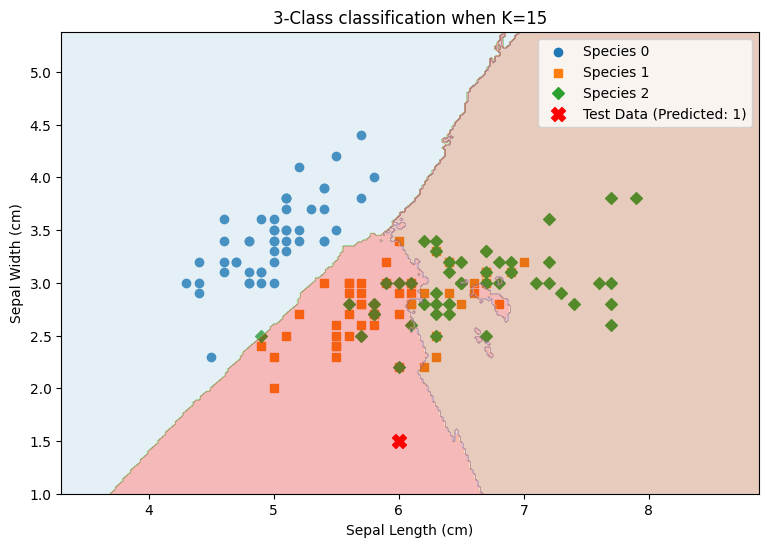

In [19]:
plt.figure(figsize=(9, 6))
for s in set(species):
    indices = species == s
    plt.scatter(sepal_length[indices], sepal_width[indices], label=f'Species {s}', marker=['o', 's', 'D'][s])

# Plot decision boundaries with colored background
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z)
type(Z)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)


test_data_point = np.array([[6, 1.5]]) #Test Data
predicted_class = clf.predict(test_data_point)

# Plotting the test data point
plt.scatter(test_data_point[:, 0], test_data_point[:, 1], marker='X', s=100, c='red', label=f'Test Data (Predicted: {predicted_class[0]})')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'3-Class classification when K={K}')
plt.legend()
plt.show()